### BP神经网络+sklearn做图片识别

### 1. 载入数据集

In [18]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split #切割数据,交叉验证法
from sklearn.preprocessing import LabelBinarizer #标签二值化

In [2]:
#载入数据:8*8的数据集
digits = load_digits()

In [10]:
X = digits.data
y = digits.target

#### 打印输出图片

(1797, 64)


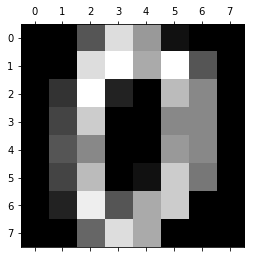

In [133]:
import pylab as pl

#载入数据集
digits = load_digits()
print(digits.data.shape)

#灰度化图片
pl.gray()
pl.matshow(digits.images[0])
pl.show()

#### 这个数据集是sklearn里面带的数据集，图片大小是8*8的，将数据项存入X，将标签项存入Y。这个不要额外下载，声明就可以使用。

### 2. 数据归一化处理

In [13]:
# 输入数据归一化
X -= X.min()
X /= X.max()

1. 数据为什么要归一化处理？当数据集的数值过大，即便乘以较小的权重后仍然还是一个很大的数时，当代入sigmoid激活函数中，激活函数的输出就趋近于1，不利于学习
2. 怎么操作使数据归一化？原始数据集中每一个数据先减去最小的那个数，将得到的新数据集再除以最大的那个数既可（大家可以举个例子：2，7，5，9。试一试就知道）

### 3. 切分数据，与标签二值化

In [17]:
# sklearn切分数据
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [23]:
#标签二值化：将原始标签(十进制)转为新标签(二进制)
labels_train = LabelBinarizer().fit_transform(y_train)
labels_test = LabelBinarizer().fit_transform(y_test)

* sklearn中直接一条语句就可以切分数据了：将数据项、标签项切分出来，3/4做训练集，剩下的1/4做测试集。
* 为什么要标签二值化？因为我们存入的标签是0，1，2，，，9这十个数，而计算机的识别都是0-1字符串，所以满足计算机识别分类，就需要进行标签二值化。
* 怎么标签二值化？举例最好说明：用长度为10的字符串表示如下： 
0 –>1000000000；3 –>0001000000；8 –>0000000010

### 4.训练模型

In [26]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [27]:
def dsigmoid(x):
    return x*(1 - x)

In [41]:
layers = [64,100,10] # 定义层

#### 权重的初始化范围-1和1：+1的一列是偏置值

In [36]:
V = np.random.random((layers[0] + 1,layers[1] + 1)) * 2 - 1 #(65, 101)

In [37]:
V
V.shape

(65, 101)

In [38]:
W = np.random.random((layers[1] + 1,layers[2] + 1)) * 2 - 1 # (101, 11)

In [40]:
W.shape

(101, 11)

#### 添加偏置值：最后一列全是1

In [43]:
tmp = np.ones([X.shape[0],X.shape[1] + 1])

In [44]:
tmp.shape

(1797, 65)

In [53]:
tmp[:,0:-1] = X

In [80]:
X = tmp

In [121]:
epochs = 20000
lr = 0.11

In [129]:
for n in range(epochs + 1):
    #在训练集中随机选取一行(一个数据)：randint()在范围内随机生成一个int类型
    i = np.random.randint(X.shape[0])
    x = [X[i]]
    #转成二维数据：由一维一行转为二维一行
    x = np.atleast_2d(x)
    
    #L1:输入层传递给隐藏层的值：输入层64结点，隐藏层100个节点
    L1 = sigmoid(np.dot(x,V))
    #L2:隐藏层传递到输出层的值：输出层10个节点
    L2 = sigmoid(np.dot(L1,W))
    
    # L2_delta:输出层对隐藏层的误差该变量
    L2_delta = (y[i] - L2) * dsigmoid(L2)
    #L1_delta：隐藏层对输入层的误差改变量
    L1_delta = L2_delta.dot(W.T) * dsigmoid(L1)
    
    #计算改变后的新权重
    W += lr * L1.T.dot(L2_delta)
    V += lr * x.T.dot(L1_delta)
    
    #每训练1000次输出一次准确率
    if n%1000 == 0:
        predictions = []
        for j in range(X_test.shape[0]):
            # 获取预计结果：返回与十个标签值逼近的距离，数值最大的选为本次的预测值
            o = predict(X_test[j])
            #将最大的数值所对应的标签返回
            predictions.append(np.argmax(o))
        #np.equal():相同返回true，不同返回false
        accuracy = np.mean(np.equal(predictions,y_test))
        print('迭代次数',n,'准确率:',accuracy)
    

迭代次数 0 准确率: 0.00666666666667
迭代次数 1000 准确率: 0.02
迭代次数 2000 准确率: 0.0222222222222
迭代次数 3000 准确率: 0.0222222222222
迭代次数 4000 准确率: 0.0177777777778
迭代次数 5000 准确率: 0.02
迭代次数 6000 准确率: 0.0177777777778
迭代次数 7000 准确率: 0.02
迭代次数 8000 准确率: 0.0222222222222
迭代次数 9000 准确率: 0.0222222222222
迭代次数 10000 准确率: 0.0222222222222
迭代次数 11000 准确率: 0.0222222222222
迭代次数 12000 准确率: 0.0222222222222
迭代次数 13000 准确率: 0.0222222222222
迭代次数 14000 准确率: 0.0222222222222
迭代次数 15000 准确率: 0.0222222222222
迭代次数 16000 准确率: 0.0222222222222
迭代次数 17000 准确率: 0.0222222222222
迭代次数 18000 准确率: 0.0222222222222
迭代次数 19000 准确率: 0.0222222222222
迭代次数 20000 准确率: 0.0222222222222


In [128]:
def predict(x):
    tmp = np.ones([x.shape[0] + 1])
    tmp[0:-1] = x
    x = tmp
    x = np.atleast_2d(x)
    L1 = sigmoid(np.dot(x,V))
    L2 = sigmoid(np.dot(L1,W))
    return L2
    

In [130]:
class NeuralNetwork:
    def __init__(self,layers):#(64,100,10)
        #权重的初始化,范围-1到1：+1的一列是偏置值
        self.V = np.random.random((layers[0] + 1, layers[1]+1))*2 - 1
        self.W = np.random.random((layers[1] + 1, layers[2])) * 2 - 1

    def train(self,X,y,lr=0.11,epochs=10000):
        #添加偏置值：最后一列全是1
        temp = np.ones([X.shape[0],X.shape[1]+1])
        temp[:,0:-1] = X
        X = temp

        for n in range(epochs+1):
            #在训练集中随机选取一行(一个数据)：randint()在范围内随机生成一个int类型
            i = np.random.randint(X.shape[0])
            x = [X[i]]
            #转为二维数据：由一维一行转为二维一行
            x = np.atleast_2d(x)

            # L1：输入层传递给隐藏层的值；输入层64个节点，隐藏层100个节点
            # L2：隐藏层传递到输出层的值；输出层10个节点
            L1 = sigmoid(np.dot(x, self.V))
            L2 = sigmoid(np.dot(L1, self.W))

            # L2_delta：输出层对隐藏层的误差改变量
            # L1_delta：隐藏层对输入层的误差改变量
            L2_delta = (y[i] - L2) * dsigmoid(L2)
            L1_delta = L2_delta.dot(self.W.T) * dsigmoid(L1)

            # 计算改变后的新权重
            self.W += lr * L1.T.dot(L2_delta)
            self.V += lr * x.T.dot(L1_delta)

            #每训练1000次输出一次准确率
            if n%1000 == 0:
                predictions = []
                for j in range(X_test.shape[0]):
                    #获取预测结果：返回与十个标签值逼近的距离，数值最大的选为本次的预测值
                    o = self.predict(X_test[j])
                    #将最大的数值所对应的标签返回
                    predictions.append(np.argmax(o))
                #np.equal()：相同返回true，不同返回false
                accuracy = np.mean(np.equal(predictions,y_test))
                print('迭代次数：',n,'准确率：',accuracy)

    def predict(self,x):
        # 添加偏置值：最后一列全是1
        temp = np.ones([x.shape[0] + 1])
        temp[0:-1] = x
        x = temp
        # 转为二维数据：由一维一行转为二维一行
        x = np.atleast_2d(x)

        # L1：输入层传递给隐藏层的值；输入层64个节点，隐藏层100个节点
        # L2：隐藏层传递到输出层的值；输出层10个节点
        L1 = sigmoid(np.dot(x, self.V))
        L2 = sigmoid(np.dot(L1, self.W))
        return L2

In [132]:
NN = NeuralNetwork([64,100,10])
print('开始训练')
NN.train(X_train,labels_train,epochs=20000)
print('训练结束')

开始训练
迭代次数： 0 准确率： 0.0977777777778
迭代次数： 1000 准确率： 0.593333333333
迭代次数： 2000 准确率： 0.9
迭代次数： 3000 准确率： 0.928888888889
迭代次数： 4000 准确率： 0.948888888889
迭代次数： 5000 准确率： 0.937777777778
迭代次数： 6000 准确率： 0.948888888889
迭代次数： 7000 准确率： 0.953333333333
迭代次数： 8000 准确率： 0.962222222222
迭代次数： 9000 准确率： 0.96
迭代次数： 10000 准确率： 0.968888888889
迭代次数： 11000 准确率： 0.964444444444
迭代次数： 12000 准确率： 0.968888888889
迭代次数： 13000 准确率： 0.968888888889
迭代次数： 14000 准确率： 0.968888888889
迭代次数： 15000 准确率： 0.968888888889
迭代次数： 16000 准确率： 0.968888888889
迭代次数： 17000 准确率： 0.966666666667
迭代次数： 18000 准确率： 0.973333333333
迭代次数： 19000 准确率： 0.975555555556
迭代次数： 20000 准确率： 0.973333333333
训练结束
